In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import time

In [ ]:
import pandas as pd

df = pd.read_csv('C:/Users/lokes/Downloads/final_toxic_dataset.csv')

df = df[df['user_location'].notna()]
#df.to_csv('C:/Users/lokes/Downloads/final_con_toxic1.csv', index=False)

In [ ]:
def extract_city(location):
    if ',' in location:
        city = location.split(',')[0].strip()
    else:
        city = location.strip()
    return city

df['user_location'] = df['user_location'].apply(extract_city)
#df.to_csv('C:/Users/lokes/Downloads/final_con_toxic2.csv', index=False)

In [ ]:
geolocator = Nominatim(user_agent='my_app')

def is_valid_city(city):
    try:
        location = geolocator.geocode(city, addressdetails=True)
        if location:
            return True
        else:
            return False
    except (GeocoderTimedOut, GeocoderServiceError):
        return False

def get_country_name(city):
    if is_valid_city(city):
        try:
            time.sleep(1)
            location = geolocator.geocode(city, addressdetails=True)
            if location:
                country = location.raw['address'].get('country', 'Unknown')
            else:
                country = 'Unknown'
        except (GeocoderTimedOut, GeocoderServiceError):
            country = 'Unknown'
    else:
        country = 'Unknown'
    return country

df['Country_Name'] = df['user_location'].apply(get_country_name)
df.to_csv('C:/Users/lokes/OneDrive/Desktop/final_toxic_countries.csv', index=False)

In [3]:
import pandas as pd

df = pd.read_csv('C:/Users/lokes/OneDrive/Desktop/final_toxic_countries.csv')

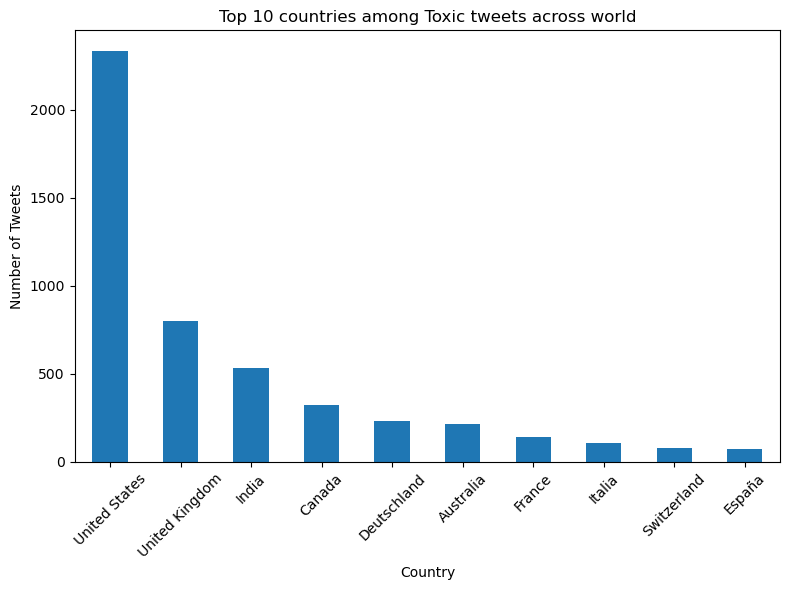

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter out the rows where 'Country_Name' is 'Unknown'
filtered_df = df[df['Country_Name'] != 'Unknown']

# Get the counts of each country, taking only the top 10
tweet_counts = filtered_df['Country_Name'].value_counts().head(10)

# Plotting
plt.figure(figsize=(8, 6))
tweet_counts.plot(kind='bar')
plt.title('Top 10 countries among Toxic tweets across world')
plt.xlabel('Country')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


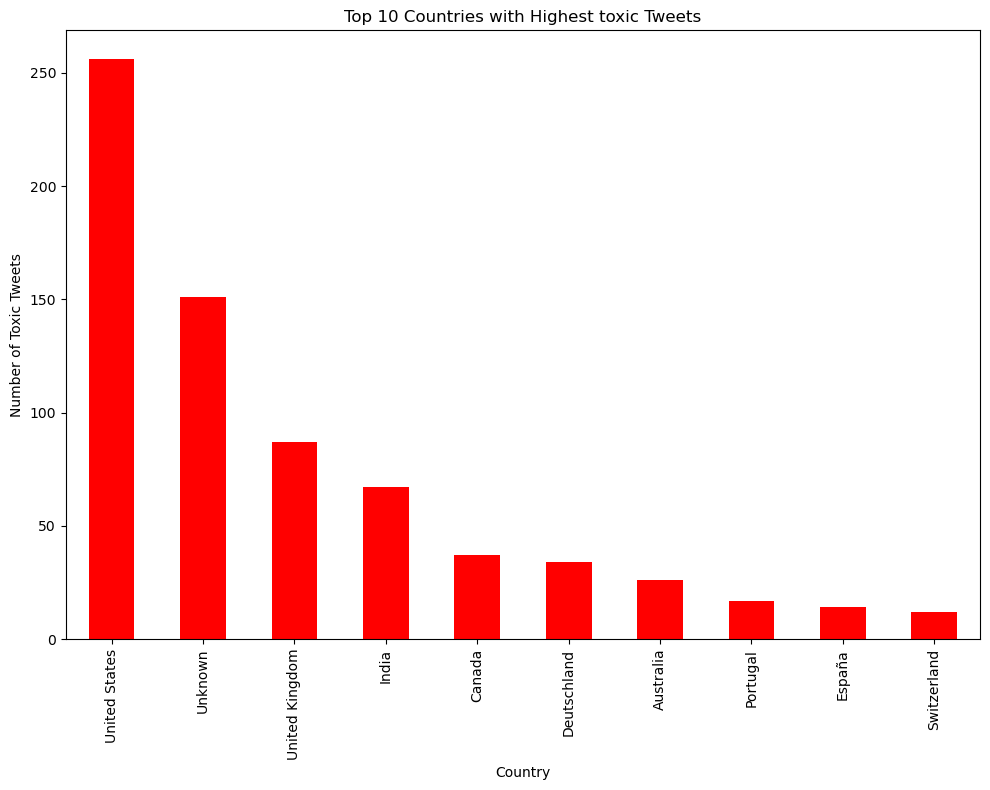

In [6]:
toxic_tweets = df[df['toxic'] == 1]['Country_Name'].value_counts()

if not toxic_tweets.empty:
    plt.figure(figsize=(10,8))
    toxic_tweets.head(10).plot(kind='bar', color='red')  # Plotting only the top 10
    plt.title('Top 10 Countries with Highest toxic Tweets')
    plt.xlabel('Country')
    plt.ylabel('Number of Toxic Tweets')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("There are no records with 'Toxic' marked as 1 in the dataset.")

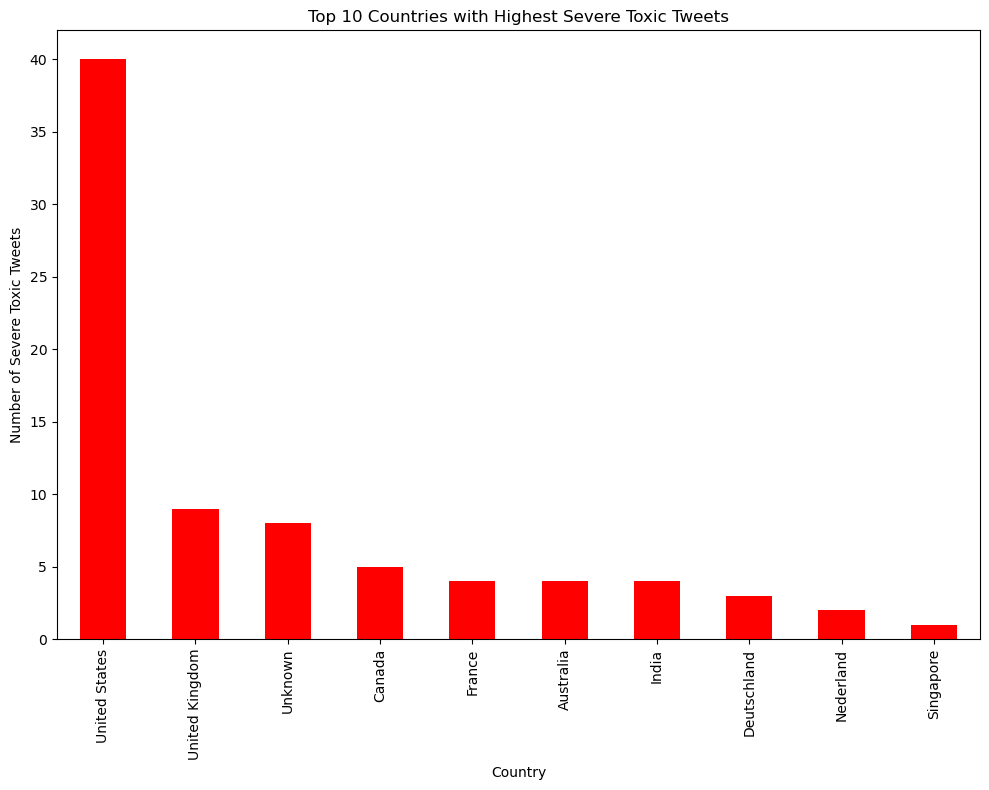

In [7]:
severe_toxic_tweets = df[df['severe_toxic'] == 1]['Country_Name'].value_counts()

if not severe_toxic_tweets.empty:
    plt.figure(figsize=(10,8))
    severe_toxic_tweets.head(10).plot(kind='bar', color='red')  # Plotting only the top 10
    plt.title('Top 10 Countries with Highest Severe Toxic Tweets')
    plt.xlabel('Country')
    plt.ylabel('Number of Severe Toxic Tweets')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("There are no records with 'Severe_Toxic' marked as 1 in the dataset.")

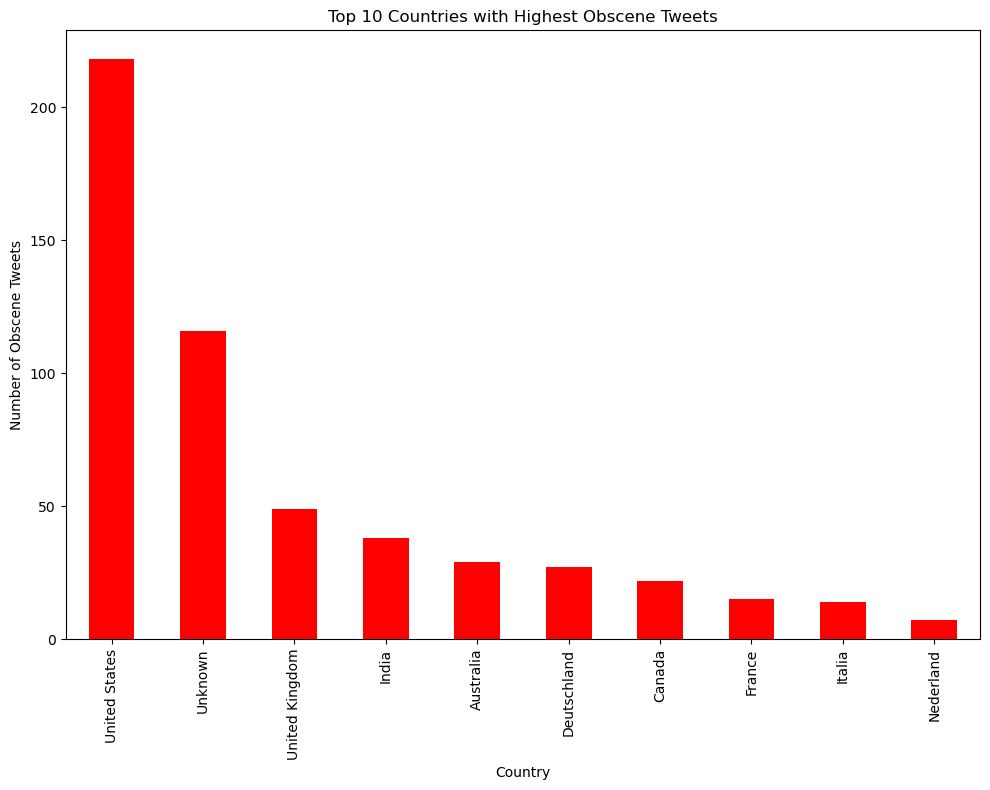

In [81]:
obscene_tweets = df[df['obscene'] == 1]['Country_Name'].value_counts()

if not severe_toxic_tweets.empty:
    plt.figure(figsize=(10,8))
    obscene_tweets.head(10).plot(kind='bar', color='red')  # Plotting only the top 10
    plt.title('Top 10 Countries with Highest Obscene Tweets')
    plt.xlabel('Country')
    plt.ylabel('Number of Obscene Tweets')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("There are no records with 'Obscene' marked as 1 in the dataset.")

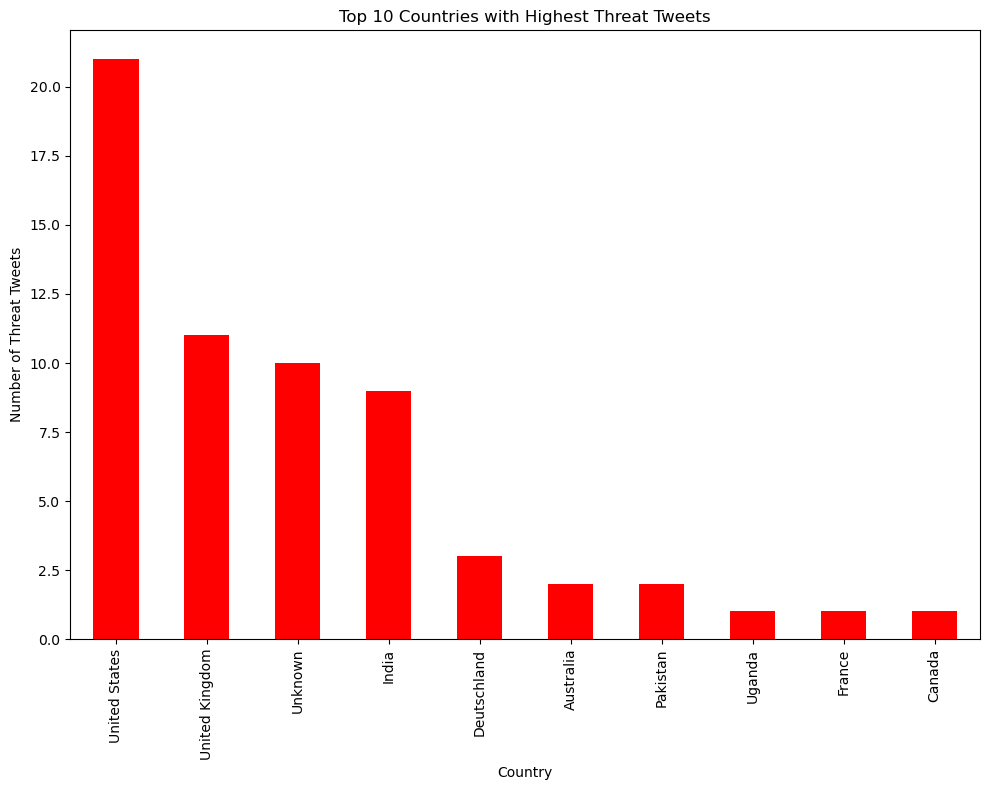

In [82]:
threat_tweets = df[df['threat'] == 1]['Country_Name'].value_counts()

if not threat_tweets.empty:
    plt.figure(figsize=(10,8))
    threat_tweets.head(10).plot(kind='bar', color='red')  # Plotting only the top 10
    plt.title('Top 10 Countries with Highest Threat Tweets')
    plt.xlabel('Country')
    plt.ylabel('Number of Threat Tweets')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("There are no records with 'Threat' marked as 1 in the dataset.")

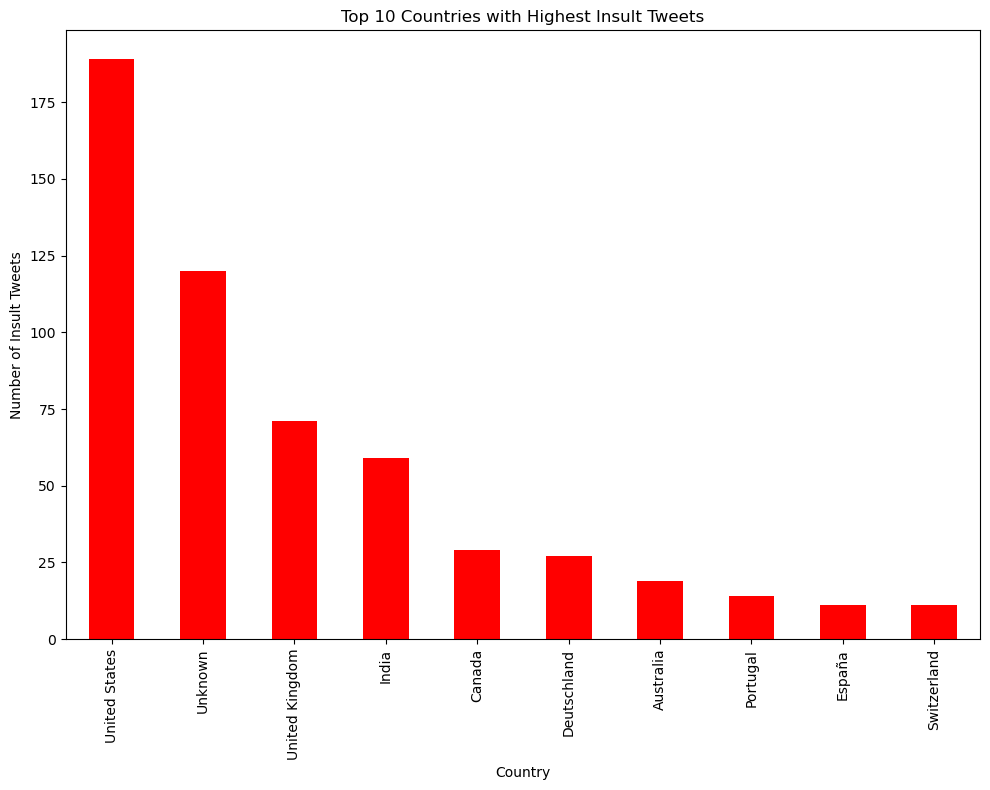

In [83]:
insult_tweets = df[df['insult'] == 1]['Country_Name'].value_counts()

if not insult_tweets.empty:
    plt.figure(figsize=(10,8))
    insult_tweets.head(10).plot(kind='bar', color='red')  # Plotting only the top 10
    plt.title('Top 10 Countries with Highest Insult Tweets')
    plt.xlabel('Country')
    plt.ylabel('Number of Insult Tweets')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("There are no records with 'Insult' marked as 1 in the dataset.")

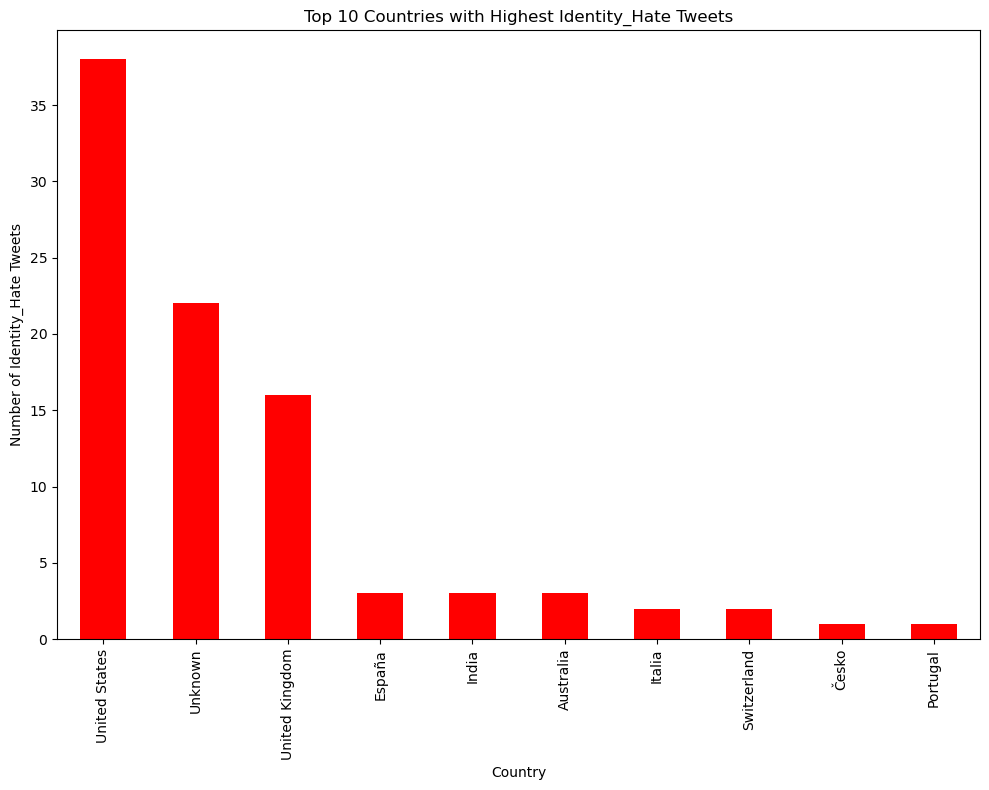

In [84]:
identity_hate_tweets = df[df['identity_hate'] == 1]['Country_Name'].value_counts()

if not insult_tweets.empty:
    plt.figure(figsize=(10,8))
    identity_hate_tweets.head(10).plot(kind='bar', color='red')  # Plotting only the top 10
    plt.title('Top 10 Countries with Highest Identity_Hate Tweets')
    plt.xlabel('Country')
    plt.ylabel('Number of Identity_Hate Tweets')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("There are no records with 'Identity_Hate' marked as 1 in the dataset.")

In [85]:
toxic_counts = df['toxic'].value_counts()
severe_toxic_counts = df['severe_toxic'].value_counts()
obscene_counts = df['obscene'].value_counts()
threat_counts = df['threat'].value_counts()
insult_counts = df['insult'].value_counts()
identity_hate_counts = df['identity_hate'].value_counts()
print(toxic_counts)
print(severe_toxic_counts)
print(toxic_counts)
print(obscene_counts)
print(threat_counts)
print(insult_counts)
print(identity_hate_counts)

toxic
0    6323
1     896
Name: count, dtype: int64
severe_toxic
0.0    7127
1.0      90
Name: count, dtype: int64
toxic
0    6323
1     896
Name: count, dtype: int64
obscene
0.0    6558
1.0     658
Name: count, dtype: int64
threat
0.0    7146
1.0      72
Name: count, dtype: int64
insult
0.0    6526
1.0     692
Name: count, dtype: int64
identity_hate
0.0    7111
1.0     107
Name: count, dtype: int64


In [86]:

verified_users = df[df['user_verified'] == True]


print("Number of verified users:", len(verified_users))

Number of verified users: 179


In [87]:
import pandas as pd
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
country_counts = {}
for category in categories:
    country_counts[category] = df[df[category] == 1]['Country_Name'].value_counts()


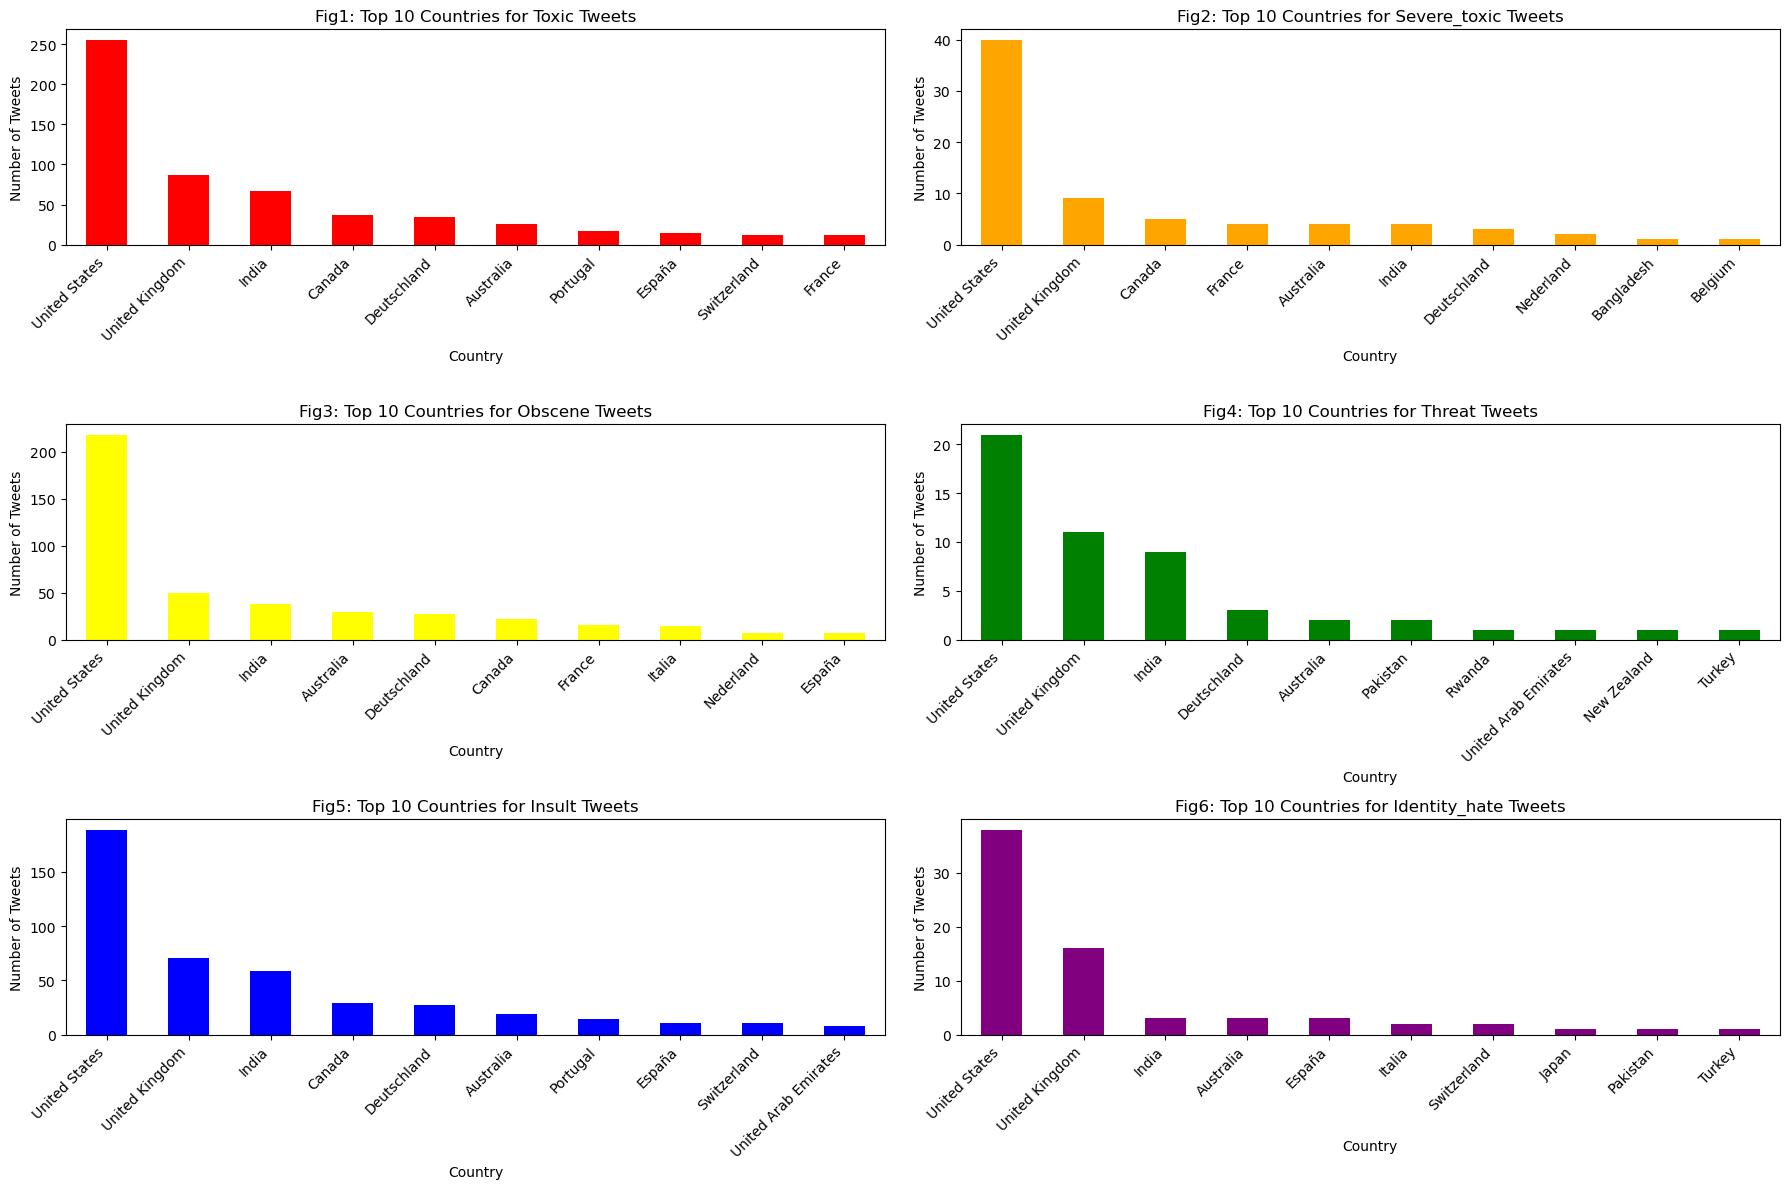

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
country_counts = {}

df_filtered = df[df['Country_Name'] != 'Unknown']

for category in categories:
    country_counts[category] = df_filtered[df_filtered[category] == 1]['Country_Name'].value_counts()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
axes = axes.flatten()

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
for i, category in enumerate(categories):
    ax = axes[i]
    data = country_counts[category].sort_values(ascending=False).head(10)
    data.plot(kind='bar', ax=ax, color=colors[i])
    ax.set_title(f'Fig{i+1}: Top 10 Countries for {category.capitalize()} Tweets')
    ax.set_xlabel('Country')
    ax.set_ylabel('Number of Tweets')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show() 

In [8]:
toxic_counts = df['obscene'].value_counts()
print(toxic_counts)

obscene
0.0    6553
1.0     656
Name: count, dtype: int64


In [9]:
import pandas as pd

columns_to_clean = ['toxic', 'severe_toxic', 'obscene', 'insult', 'threat', 'identity_hate']
df[columns_to_clean] = df[columns_to_clean].fillna(0).astype(int)

df['Overall_Toxic'] = (df['toxic'] | df['severe_toxic'] | df['obscene'] | df['insult'] | df['threat'] | df['identity_hate'])

country_toxic_counts = df.groupby('Country_Name')['Overall_Toxic'].sum()

top_10_countries = country_toxic_counts.sort_values(ascending=False).head(10)

print(top_10_countries)


Country_Name
United States     522
Unknown           294
United Kingdom    154
India             116
Canada             63
Deutschland        61
Australia          59
France             28
España             24
Switzerland        22
Name: Overall_Toxic, dtype: int32


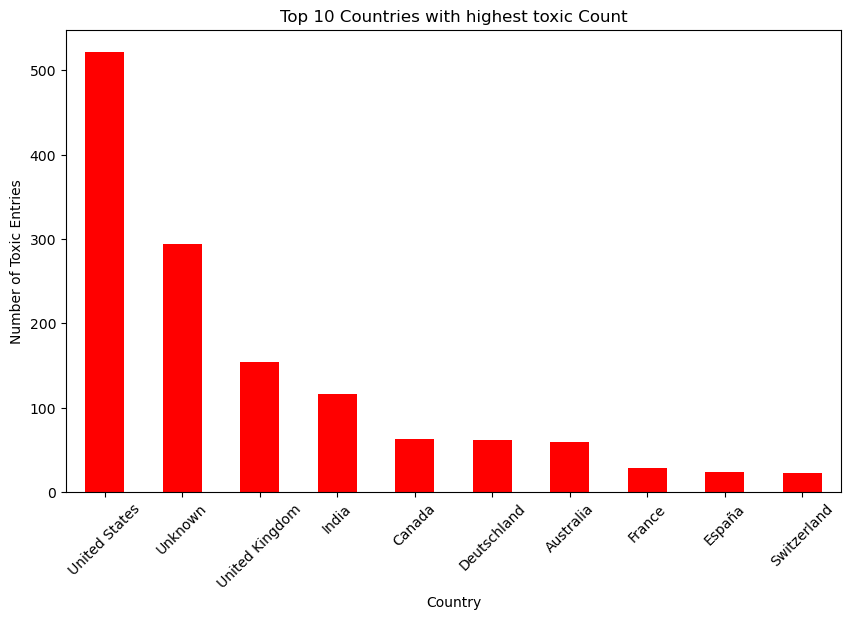

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

columns_to_clean = ['toxic', 'severe_toxic', 'obscene', 'insult', 'threat', 'identity_hate']
df[columns_to_clean] = df[columns_to_clean].fillna(0).astype(int)
df['Overall_Toxic'] = (df['toxic'] | df['severe_toxic'] | df['obscene'] | df['insult'] | df['threat'] | df['identity_hate'])

country_toxic_counts = df.groupby('Country_Name')['Overall_Toxic'].sum()

top_10_countries = country_toxic_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='Red')
plt.title('Top 10 Countries with highest toxic Count')
plt.xlabel('Country')
plt.ylabel('Number of Toxic Entries')
plt.xticks(rotation=45)

plt.show()

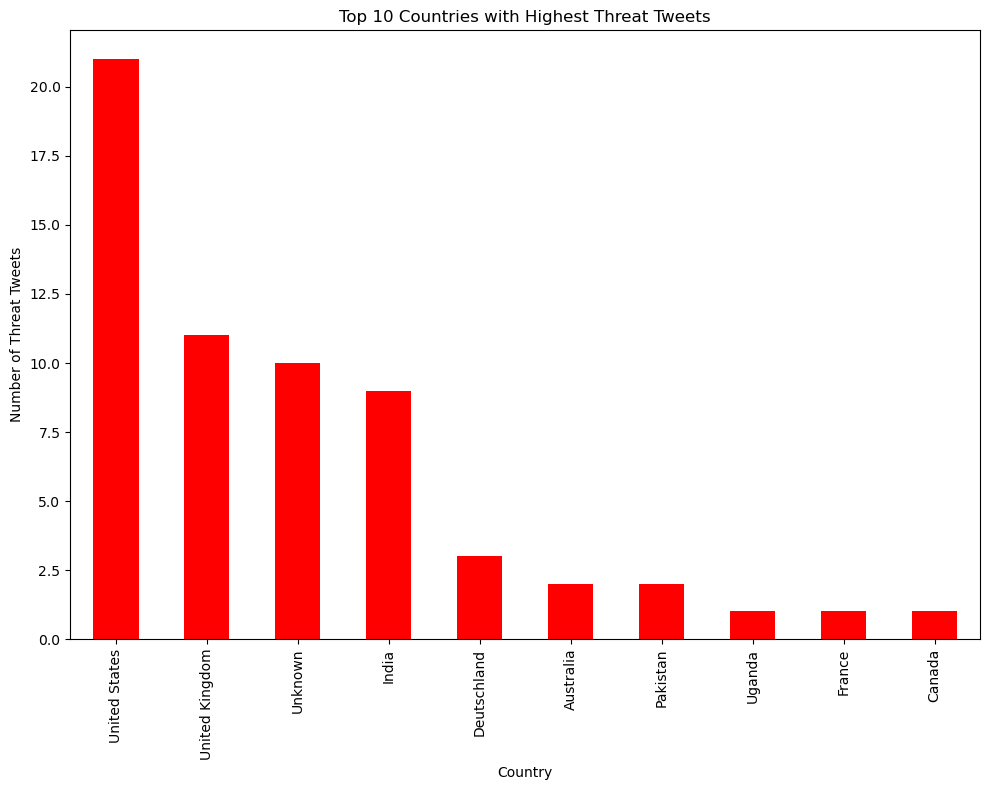

The country with the highest number of threat tweets is United States with 21 threats.
The country with the lowest number of threat tweets is Uganda with 1 threats.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

threat_tweets = df[df['threat'] == 1]['Country_Name'].value_counts()
if not threat_tweets.empty:
    plt.figure(figsize=(10, 8))
    threat_tweets.head(10).plot(kind='bar', color='red')  # Plotting only the top 10
    plt.title('Top 10 Countries with Highest Threat Tweets')
    plt.xlabel('Country')
    plt.ylabel('Number of Threat Tweets')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    highest_threat_country = threat_tweets.idxmax()
    highest_threat_count = threat_tweets.max()
    print(f"The country with the highest number of threat tweets is {highest_threat_country} with {highest_threat_count} threats.")
    lowest_threat_country = threat_tweets.idxmin()
    lowest_threat_count = threat_tweets.min()
    print(f"The country with the lowest number of threat tweets is {lowest_threat_country} with {lowest_threat_count} threats.")
else:
    print("There are no records with 'Threat' marked as 1 in the dataset.")


In [11]:
unique_countries = df['Country_Name'].nunique()
print(f"The total number of unique countries in the dataset is: {unique_countries}")

The total number of unique countries in the dataset is: 129


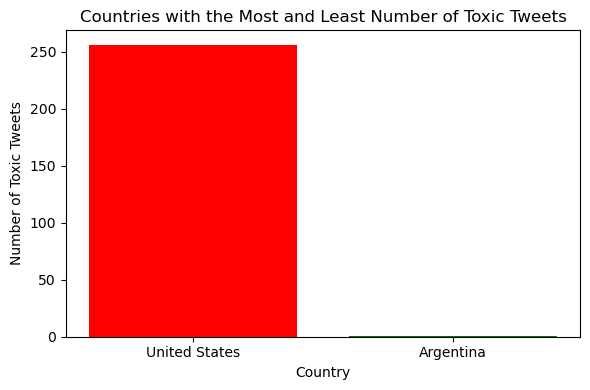

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
toxic_counts = df[df['toxic'] == 1].groupby('Country_Name').size()

max_toxic_count = toxic_counts.max()
max_toxic_country = toxic_counts.idxmax()
min_toxic_count = toxic_counts.min()
least_toxic_country = toxic_counts.idxmin()
extreme_toxic_data = pd.DataFrame({
    'Country': [max_toxic_country, least_toxic_country],
    'Number of Toxic Tweets': [max_toxic_count, min_toxic_count]
})

# Plotting
plt.figure(figsize=(6,4))
plt.bar(extreme_toxic_data['Country'], extreme_toxic_data['Number of Toxic Tweets'], color=['red', 'green'])
plt.title('Countries with the Most and Least Number of Toxic Tweets')
plt.xlabel('Country')
plt.ylabel('Number of Toxic Tweets')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


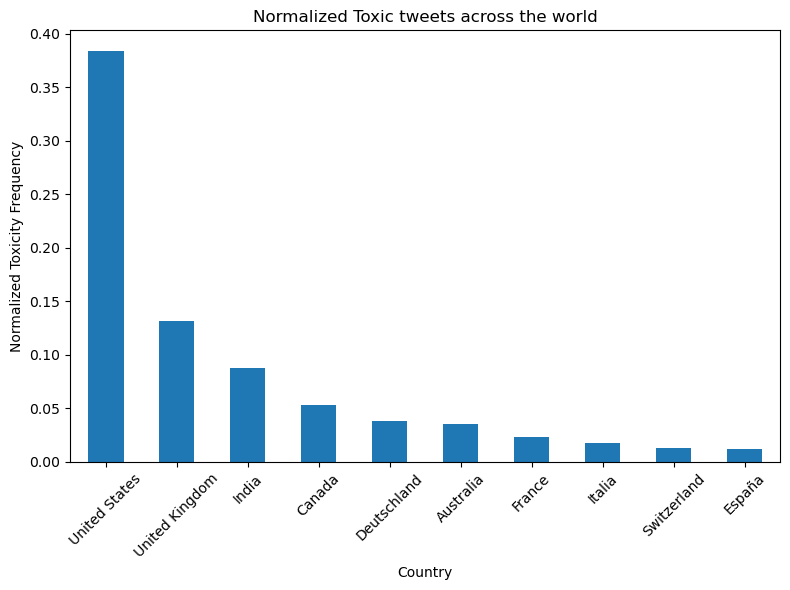

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_df = df[df['Country_Name'] != 'Unknown']
tweet_counts = filtered_df['Country_Name'].value_counts()
total_tweets = tweet_counts.sum()
normalized_toxic_tweets_count = tweet_counts / total_tweets
normalized_tweet_counts = normalized_toxic_tweets_count.head(10)
plt.figure(figsize=(8, 6))
normalized_tweet_counts.plot(kind='bar')
plt.title('Normalized Toxic tweets across the world')
plt.xlabel('Country')
plt.ylabel('Normalized Toxicity Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
